<a href="https://colab.research.google.com/github/blessjal/blessjal/blob/main/class_project_eli5_shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier


In [107]:
df = pd.read_csv('/content/sample_data/breast-cancer.data')
df.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [108]:
columns = [ 'Class', 'age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df.columns = columns
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [109]:
df['age'] = df['age'].map({'20-29':25.5, '30-39':35.5, '40-49':45.5, '50-59':55.5, '60-69':65.5, '70-79':75.5})

In [112]:
df['node-caps'].replace('?', np.nan, inplace=True)


In [113]:
df['breast-quad'].replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [114]:
y = df['Class'].map({'no-recurrence-events':0, 'recurrence-events':1})
X = df.drop('Class', axis=1)

In [115]:
num_features = ['age']
cat_features = ['menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

In [116]:
preprocessor = ColumnTransformer([('numerical', 'passthrough', num_features),
                                  ('categorical', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_features)])

In [117]:
# Logistic Regression Model
lr_model = Pipeline([('preprocessor', preprocessor ), 
                     ('model', LogisticRegression(class_weight='balanced', solver='liblinear'))])

# Decision Tree Model
dt_model = Pipeline([('preprocessor', preprocessor ), 
                     ('model', DecisionTreeClassifier(class_weight='balanced'))])

# Random Forest Model
rf_model = Pipeline([('preprocessor', preprocessor ), 
                     ('model', RandomForestClassifier(class_weight='balanced', n_estimators=100))])

# XGB model
xgb_model = Pipeline([('preprocessor', preprocessor ), 
                     ('model', XGBClassifier(scale_pos_weight=(1 - y.mean()), n_jobs=-1))])

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [120]:
params = {"model__C": [1, 1.3, 1.5]}
gs = GridSearchCV(lr_model, param_grid=params, n_jobs=-1, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['age']),
                                                                        ('categorical',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
   

In [121]:
print(gs.best_params_)
print(gs.best_score_)

{'model__C': 1}
0.7045883940620783


In [122]:
lr_model.set_params(**gs.best_params_)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['menopause', 'tumor-size',
                                                   'inv-nod

In [123]:
lr_model.get_params('model')

{'memory': None,
 'model': LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'model__C': 1,
 'model__class_weight': 'balanced',
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'liblinear',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False,
 'preprocessor': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('numerical', 'passthrough', ['age']),
                         

In [124]:
lr_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['menopause', 'tumor-size',
                                                   'inv-nod

In [125]:
y_pred = lr_model.predict(X_test)

In [126]:
accuracy_score(y_test, y_pred)

0.5783132530120482

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67        59
           1       0.34      0.50      0.41        24

    accuracy                           0.58        83
   macro avg       0.55      0.56      0.54        83
weighted avg       0.63      0.58      0.60        83



In [36]:
pip install eli5


     |████████████████████████████████| 112kB 5.7MB/s 


In [128]:
import eli5

eli5.show_weights(lr_model.named_steps['model'])

Weight?,Feature
+1.093,x25
+0.796,x14
+0.674,x20
+0.589,x7
+0.542,x3
+0.415,x18
+0.381,x32
+0.293,x8
+0.291,x34
+0.273,x12


In [129]:
preprocessor = lr_model.named_steps['preprocessor']

In [130]:
ohe_categories = preprocessor.named_transformers_['categorical'].categories_

In [131]:
new_ohe_features = [f'{col}__{val}' for col, vals in zip(cat_features, ohe_categories) for val in vals ]

In [132]:
all_features = num_features + new_ohe_features

In [133]:
all_features

['age',
 'menopause__ge40',
 'menopause__lt40',
 'menopause__premeno',
 'tumor-size__0-4',
 'tumor-size__10-14',
 'tumor-size__15-19',
 'tumor-size__20-24',
 'tumor-size__25-29',
 'tumor-size__30-34',
 'tumor-size__35-39',
 'tumor-size__40-44',
 'tumor-size__45-49',
 'tumor-size__5-9',
 'tumor-size__50-54',
 'inv-nodes__0-2',
 'inv-nodes__12-14',
 'inv-nodes__15-17',
 'inv-nodes__3-5',
 'inv-nodes__6-8',
 'inv-nodes__9-11',
 'node-caps__no',
 'node-caps__yes',
 'deg-malig__1',
 'deg-malig__2',
 'deg-malig__3',
 'breast__left',
 'breast__right',
 'breast-quad__central',
 'breast-quad__left_low',
 'breast-quad__left_up',
 'breast-quad__right_low',
 'breast-quad__right_up',
 'irradiat__no',
 'irradiat__yes']

In [134]:
pd.DataFrame(lr_model.named_steps['preprocessor'].transform(X_train), columns=all_features).head()

,age,menopause__ge40,menopause__lt40,menopause__premeno,tumor-size__0-4,tumor-size__10-14,tumor-size__15-19,tumor-size__20-24,tumor-size__25-29,tumor-size__30-34,tumor-size__35-39,tumor-size__40-44,tumor-size__45-49,tumor-size__5-9,tumor-size__50-54,inv-nodes__0-2,inv-nodes__12-14,inv-nodes__15-17,inv-nodes__3-5,inv-nodes__6-8,inv-nodes__9-11,node-caps__no,node-caps__yes,deg-malig__1,deg-malig__2,deg-malig__3,breast__left,breast__right,breast-quad__central,breast-quad__left_low,breast-quad__left_up,breast-quad__right_low,breast-quad__right_up,irradiat__no,irradiat__yes
0,55.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,75.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,45.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,45.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,65.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [135]:
pd.DataFrame(lr_model.named_steps['preprocessor'].transform(X_train), columns=all_features).shape

(193, 35)

In [136]:
eli5.show_weights(lr_model.named_steps['model'], feature_names=all_features)

Weight?,Feature
+1.093,deg-malig__3
+0.796,tumor-size__50-54
+0.674,inv-nodes__9-11
+0.589,tumor-size__20-24
+0.542,menopause__premeno
+0.415,inv-nodes__3-5
+0.381,breast-quad__right_up
+0.293,tumor-size__25-29
+0.291,irradiat__yes
+0.273,tumor-size__45-49


In [137]:
i = 8
X_test.iloc[[i]]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
158,45.5,premeno,35-39,0-2,no,1,left,left_low,no


In [138]:
y_test.iloc[i]

0

In [139]:
eli5.show_prediction(lr_model.named_steps['model'],
                     lr_model.named_steps['preprocessor'].transform(X_test)[i],
                     feature_names=all_features, show_feature_values=True)

In [140]:
gs = GridSearchCV(dt_model, {'model__max_depth':[3, 5, 7],
                             'model__min_samples_split': [2, 5]},
                  n_jobs=-1, cv=5, scoring='accuracy')

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['age']),
                                                                        ('categorical',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
   

In [141]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 5, 'model__min_samples_split': 2}
0.7363022941970311


In [142]:
dt_model.set_params(**gs.best_params_)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['menopause', 'tumor-size',
                                                   'inv-nod

In [143]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.6746987951807228

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        59
           1       0.44      0.46      0.45        24

    accuracy                           0.67        83
   macro avg       0.61      0.61      0.61        83
weighted avg       0.68      0.67      0.68        83



In [145]:
eli5.show_weights(dt_model.named_steps['model'], feature_names=all_features)

Weight,Feature
0.4063,deg-malig__3
0.0935,age
0.0872,tumor-size__40-44
0.0806,tumor-size__10-14
0.0617,breast-quad__central
0.0510,breast-quad__left_low
0.0494,inv-nodes__3-5
0.0464,node-caps__no
0.0421,breast-quad__right_up
0.0377,tumor-size__15-19


In [146]:
eli5.show_prediction(dt_model.named_steps['model'],
                     dt_model.named_steps['preprocessor'].transform(X_test)[i],
                     feature_names=all_features, show_feature_values=True)

In [147]:
gs = GridSearchCV(rf_model, {'model__max_depth':[10, 15],
                             'model__min_samples_split': [5, 10]},
                  n_jobs=-1, cv=5, scoring='accuracy')

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['age']),
                                                                        ('categorical',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
   

In [148]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 10, 'model__min_samples_split': 5}
0.7464237516869096


In [149]:
rf_model.set_params(**gs.best_params_)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['menopause', 'tumor-size',
                                                   'inv-nod

In [150]:
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

In [151]:
accuracy_score(y_test, y_pred)

0.7469879518072289

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        59
           1       0.57      0.50      0.53        24

    accuracy                           0.75        83
   macro avg       0.69      0.67      0.68        83
weighted avg       0.74      0.75      0.74        83



In [153]:
eli5.show_weights(rf_model.named_steps['model'], feature_names=all_features)

Weight,Feature
0.1064 ± 0.2047,deg-malig__3
0.0782 ± 0.1111,age
0.0707 ± 0.1666,inv-nodes__0-2
0.0540 ± 0.1171,deg-malig__2
0.0383 ± 0.0784,breast-quad__left_up
0.0376 ± 0.0760,tumor-size__10-14
0.0371 ± 0.1119,deg-malig__1
0.0356 ± 0.0840,irradiat__no
0.0341 ± 0.1072,node-caps__yes
0.0341 ± 0.0623,menopause__premeno


In [155]:
gs = GridSearchCV(xgb_model, {'model__max_depth':[5, 10],
                             'model__min_child_weight': [5, 10],
                              'model__n_estimators': [25]},
                  n_jobs=-1, cv=5, scoring='accuracy')

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['age']),
                                                                        ('categorical',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
   

In [156]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 5, 'model__min_child_weight': 5, 'model__n_estimators': 25}
0.7777327935222672


In [157]:
xgb_model.set_params(**gs.best_params_)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical', 'passthrough',
                                                  ['age']),
                                                 ('categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['menopause', 'tumor-size',
                                                   'inv-nod

In [158]:
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

In [159]:
accuracy_score(y_test, y_pred)

0.7710843373493976

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        59
           1       0.78      0.29      0.42        24

    accuracy                           0.77        83
   macro avg       0.77      0.63      0.64        83
weighted avg       0.77      0.77      0.73        83



In [161]:
eli5.show_weights(xgb_model.named_steps['model'], feature_names=all_features)

Weight,Feature
0.5301,deg-malig__3
0.2724,inv-nodes__0-2
0.0538,menopause__premeno
0.0441,age
0.0407,breast-quad__left_up
0.0238,breast__left
0.0201,deg-malig__2
0.0150,breast-quad__left_low
0,tumor-size__5-9
0,tumor-size__45-49


In [88]:
pip install shap

     |████████████████████████████████| 358kB 4.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491624 sha256=512da72918f8f7bf20d7770f8b08557cd80181f823f00d9dd0fe07cb1d86c780
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [89]:
import shap
shap.initjs()

In [162]:
explainer = shap.TreeExplainer(xgb_model.named_steps['model'])

In [163]:
observations = xgb_model.named_steps['preprocessor'].transform(X_train.sample(100, random_state=0))
shap_values = explainer.shap_values(observations)

In [164]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, features=observations, feature_names=all_features)

In [165]:
shap.initjs()
i=0
shap.force_plot(explainer.expected_value, shap_values[i],
                features=observations[i], feature_names=all_features)

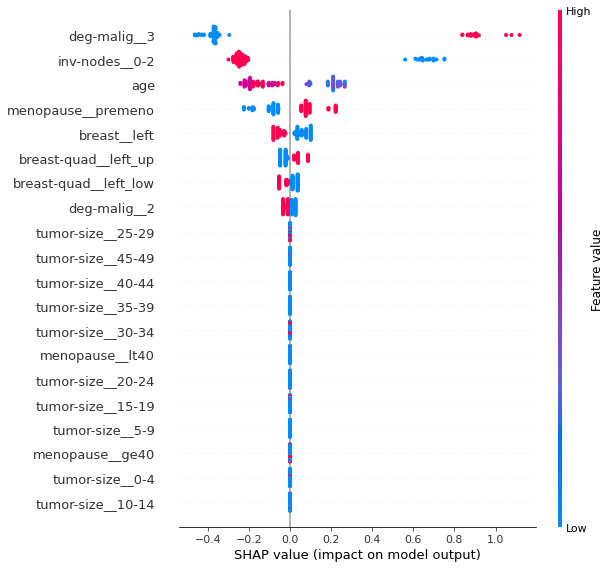

In [166]:
shap.summary_plot(shap_values, features=observations, feature_names=all_features)

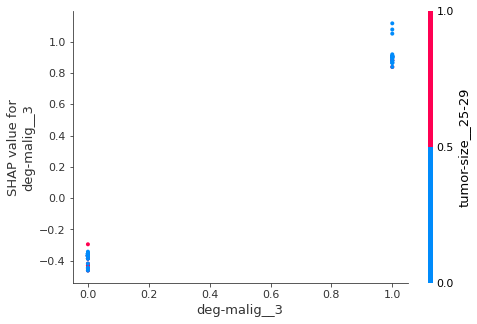

In [167]:
shap.dependence_plot('deg-malig__3', shap_values,
                     pd.DataFrame(observations, columns=all_features))